<a href="https://colab.research.google.com/github/tekinadem/Optimization/blob/main/sodoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pulp

     |████████████████████████████████| 14.2 MB 14.9 MB/s 


In [3]:
import pulp as p

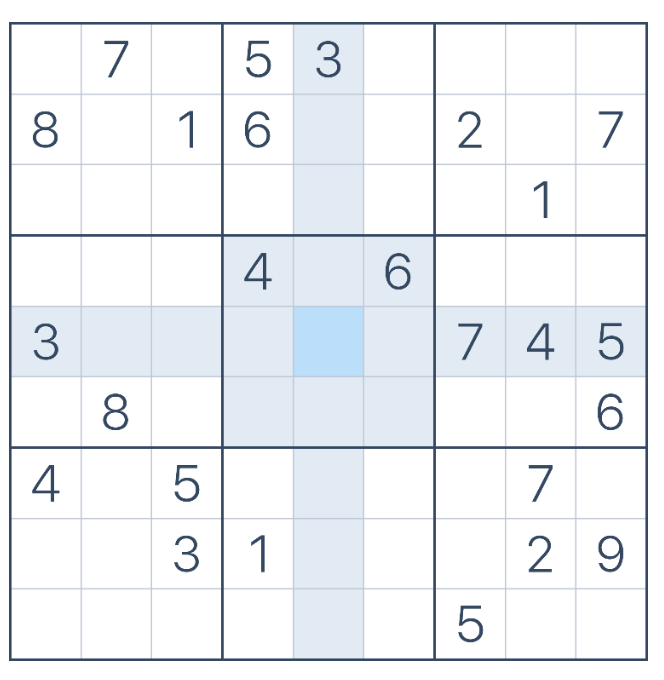

In [22]:
VALS = ROWS = COLS = range(1, 10)

In [23]:
# The boxes list is created, with the row and column index of each square in each box
Boxes = [
    [(3 * i + k + 1, 3 * j + l + 1) for k in range(3) for l in range(3)]
    for i in range(3)
    for j in range(3)
]

In [24]:
prob = p.LpProblem("HardSudokuProblem")

In [25]:
choices = p.LpVariable.dicts("Choice", (VALS, ROWS, COLS), cat="Binary")

In [26]:
for r in ROWS:
    for c in COLS:
        prob += p.lpSum([choices[v][r][c] for v in VALS]) == 1

In [27]:
for v in VALS:
    for r in ROWS:
        prob += p.lpSum([choices[v][r][c] for c in COLS]) == 1

    for c in COLS:
        prob += p.lpSum([choices[v][r][c] for r in ROWS]) == 1

    for b in Boxes:
        prob += p.lpSum([choices[v][r][c] for (r, c) in b]) == 1

In [28]:
input_data = [
    (7, 1, 2),
    (8, 2, 1),
    (1, 2, 3),
    (5, 1, 4),
    (3, 1, 5),
    (6, 2, 4),
    (2, 2, 7),
    (7, 2, 9),
    (1, 3, 8),
    (3, 5, 1),
    (8, 6, 2),
    (4, 4, 4),
    (6, 4, 6),
    (7, 5, 7),
    (4, 5, 8),
    (5, 5, 9),
    (6, 6, 9),
    (4, 7, 1),
    (5, 7, 3),
    (3, 8, 3),
    (1, 8, 4),
    (7, 7, 8),
    (2, 8, 8),
    (9, 8, 9),
    (5, 9, 7)
]

In [29]:
for (v, r, c) in input_data:
    prob += choices[v][r][c] == 1

In [30]:
prob.writeLP("Sudoku.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", p.LpStatus[prob.status])

Status: Optimal


In [31]:
sudokuout = open("sudokuouthard.txt", "w")

# The solution is written to the sudokuout.txt file
for r in ROWS:
    if r in [1, 4, 7]:
        sudokuout.write("+-------+-------+-------+\n")
    for c in COLS:
        for v in VALS:
            if p.value(choices[v][r][c]) == 1:
                if c in [1, 4, 7]:
                    sudokuout.write("| ")
                sudokuout.write(str(v) + " ")
                if c == 9:
                    sudokuout.write("|\n")
sudokuout.write("+-------+-------+-------+")
sudokuout.close()